In [3]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.ndimage import gaussian_filter

In [5]:
import sys
sys.path.append('/Users/ch/K2/projects/cassino')
from cassino.background import BackgroundModel

In [6]:
from cassino.plotting import movie

In [63]:
tpf = lk.open('../data/tess-s0003-1-2_30.000000_-15.000000_100x100_astrocut.fits')

In [67]:
bg = BackgroundModel(tpf)

In [68]:
bg.compute()

masking: 100%|██████████| 100/100 [00:10<00:00,  9.33it/s]


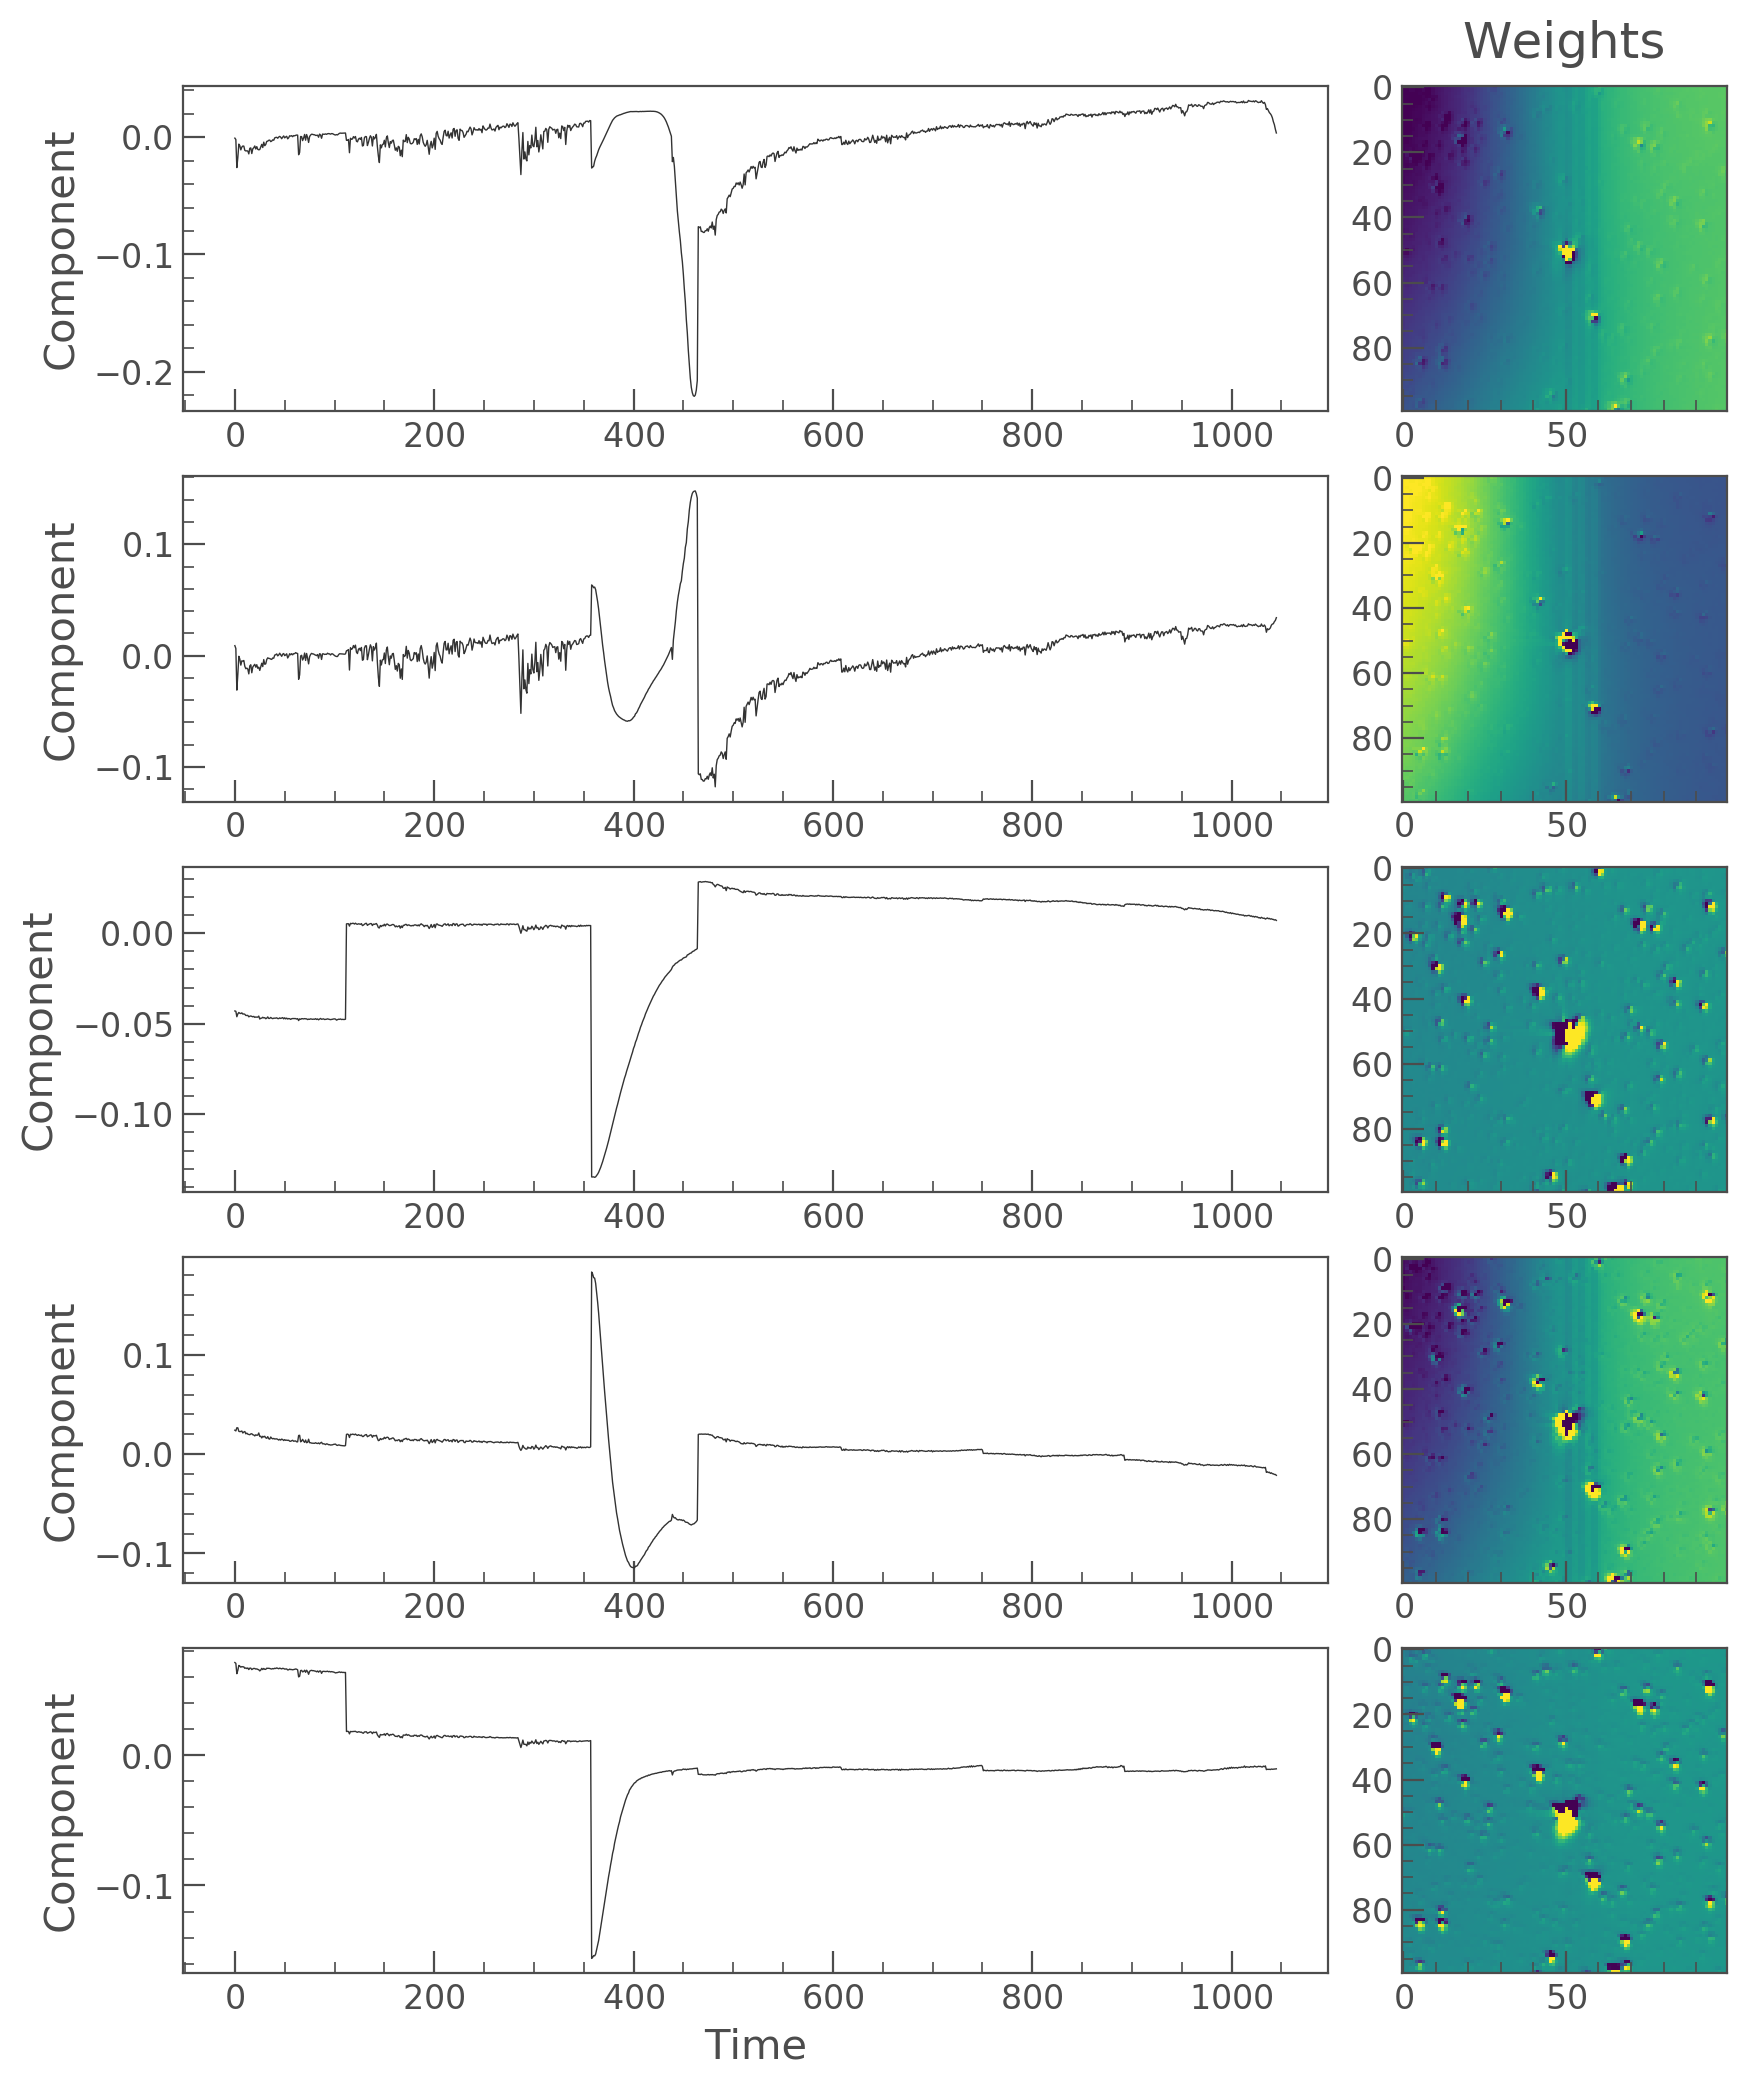

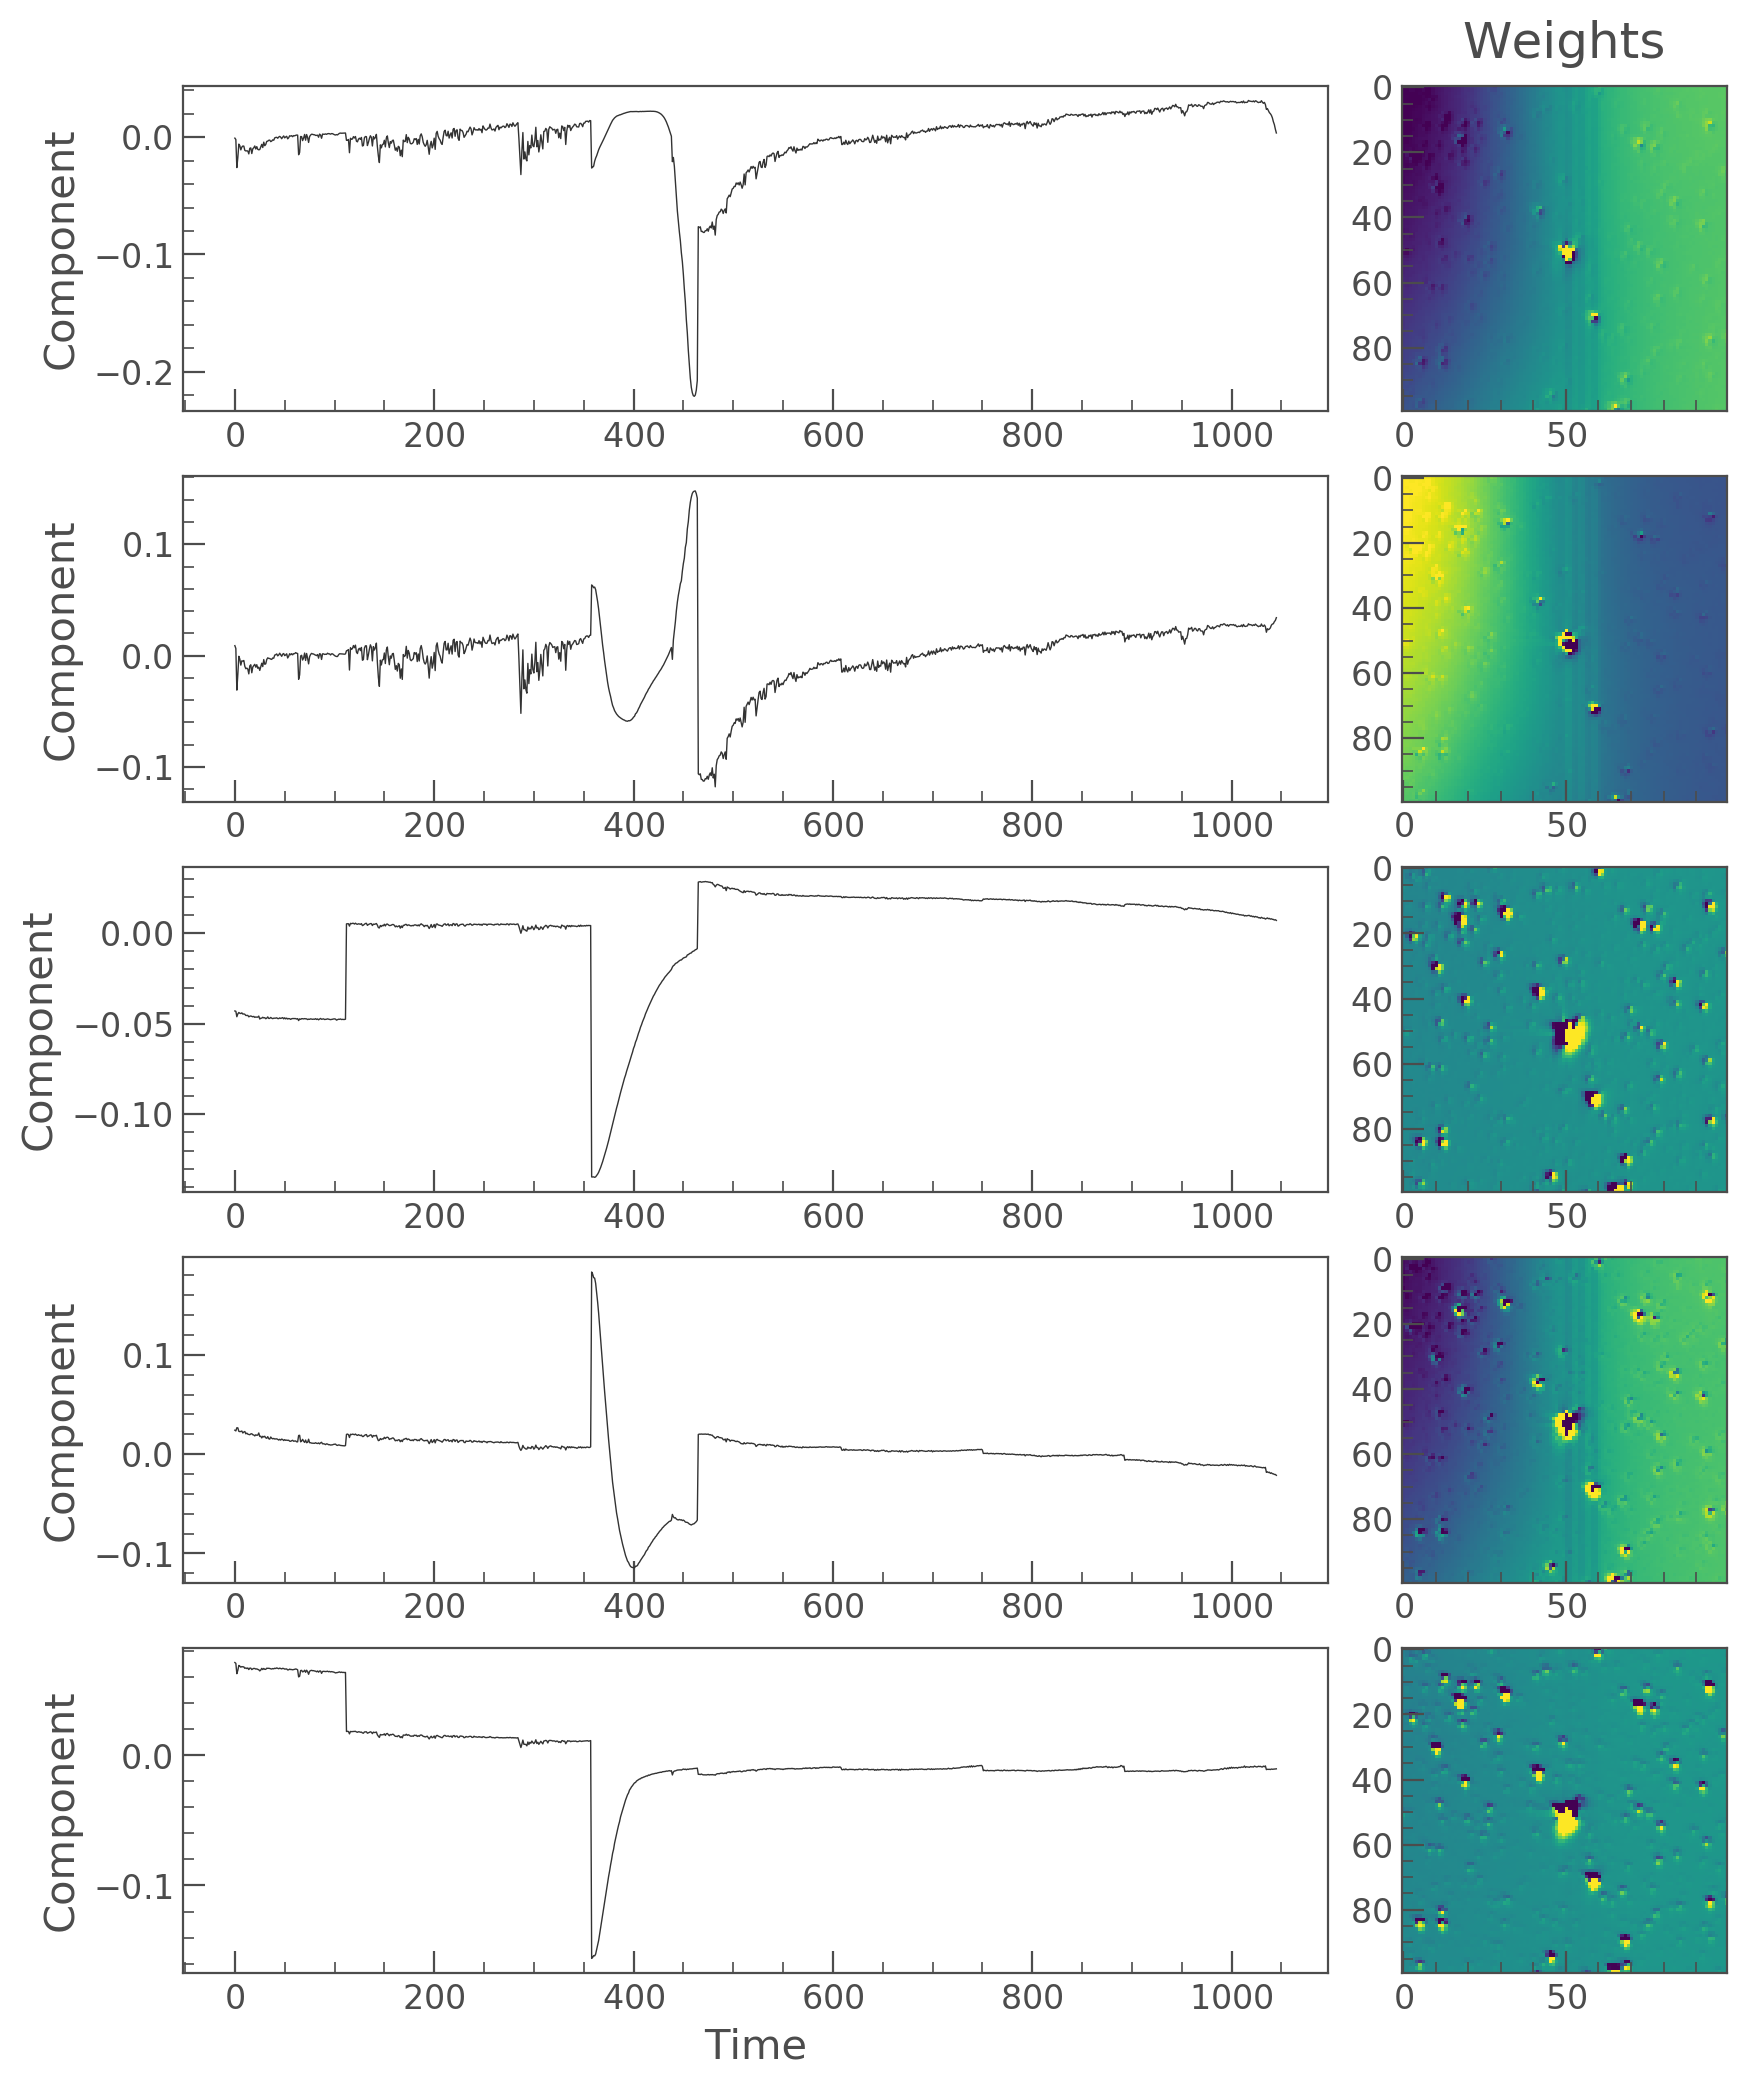

In [71]:
bg.plotComponents();

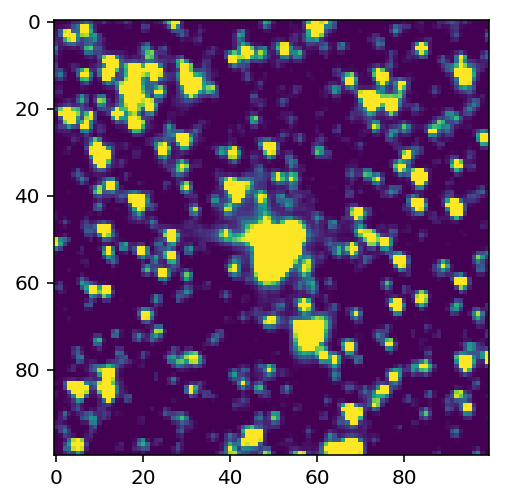

In [72]:
plt.imshow(bg.flux[100], vmin=0,  vmax=100)

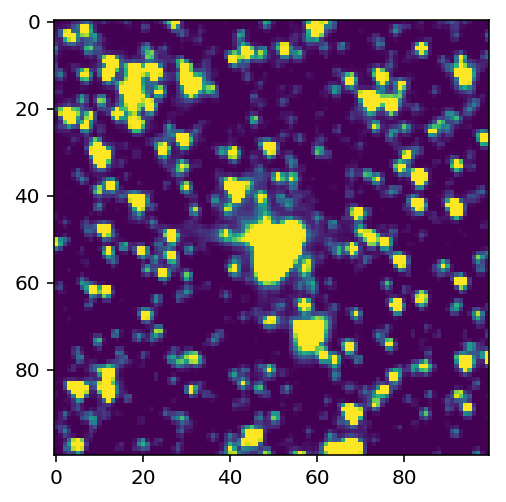

In [73]:
plt.imshow(bg.model[100], vmin=0,  vmax=100)

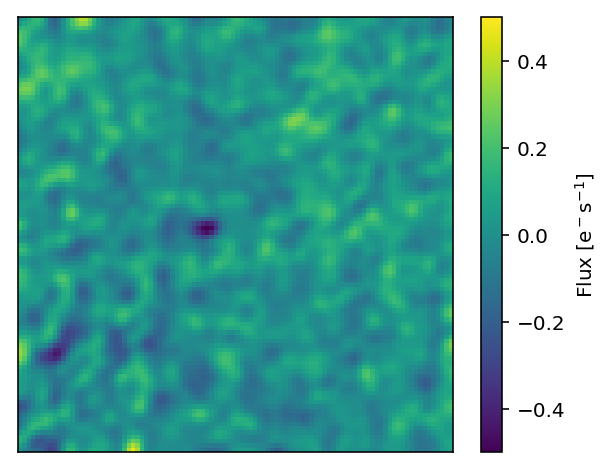

In [74]:
f = [gaussian_filter(b, 1.5) for b in bg.corrected_flux]
movie(f, 'pimenc.mp4', vmin=-0.5, vmax=0.5)